CREDIT CARD FRAUD DETECTION EXERCISE

Build a machine learning model to identify fraudulent credit card
transactions.
Preprocess and normalize the transaction data, handle class
imbalance issues, and split the dataset into training and testing sets.
Train a classification algorithm, such as logistic regression or random
forests, to classify transactions as fraudulent or genuine.
Evaluate the model's performance using metrics like precision, recall and F1-score, and consider techniques like oversampling or
undersampling for improving results.

In [2]:
import pandas as pd
import numpy as np

# to visualize the dataset
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

# To preprocess the data
from sklearn.preprocessing import StandardScaler, LabelEncoder, MinMaxScaler

# machine learning
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
#for classification tasks
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier, RandomForestRegressor
from xgboost import XGBClassifier
#metrics
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score

In [3]:
# ignore warnings
import warnings
warnings.filterwarnings('ignore')

In [5]:
# load the data
df = pd.read_csv('/creditcard.csv')

In [7]:
pd.set_option('display.max_columns', None)

In [8]:
# print the first 5 rows of the dataframe
df.head(5)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0.0
1,0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0.0
2,1,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0.0
3,1,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0.0
4,2,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0.0


In [9]:
# exploring the datatype of each column
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7973 entries, 0 to 7972
Data columns (total 31 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Time    7973 non-null   int64  
 1   V1      7973 non-null   float64
 2   V2      7973 non-null   float64
 3   V3      7973 non-null   float64
 4   V4      7973 non-null   float64
 5   V5      7973 non-null   float64
 6   V6      7973 non-null   float64
 7   V7      7973 non-null   float64
 8   V8      7973 non-null   float64
 9   V9      7973 non-null   float64
 10  V10     7973 non-null   float64
 11  V11     7973 non-null   float64
 12  V12     7973 non-null   float64
 13  V13     7973 non-null   float64
 14  V14     7973 non-null   float64
 15  V15     7972 non-null   float64
 16  V16     7972 non-null   float64
 17  V17     7972 non-null   float64
 18  V18     7972 non-null   float64
 19  V19     7972 non-null   float64
 20  V20     7972 non-null   float64
 21  V21     7972 non-null   float64
 22  

In [10]:
# data shpae
df.shape

(7973, 31)

In [11]:
# Lets see the column name
df.columns

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')

In [14]:
# Summary Statistics
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,7973.000000,7973.000000,7973.000000,7973.000000,7973.000000,7973.000000,7973.000000,7973.000000,7973.000000,7973.000000,7973.000000,7973.000000,7973.000000,7973.000000,7973.000000,7972.000000,7972.000000,7972.000000,7972.000000,7972.000000,7972.000000,7972.000000,7972.000000,7972.000000,7972.000000,7972.000000,7972.000000,7972.000000,7972.000000,7972.000000,7972.000000
mean,4257.151261,-0.299740,0.295226,0.899355,0.215736,-0.025285,0.157286,-0.026445,-0.070525,0.655244,-0.164082,0.635874,-1.022368,0.690562,0.561420,-0.067884,-0.035773,0.279405,-0.060423,-0.055885,0.043110,-0.053715,-0.165799,-0.035174,0.025977,0.088893,0.020256,0.016150,0.001161,65.413540,0.003136
std,3198.964299,1.498341,1.283914,1.090297,1.447057,1.167218,1.325015,1.063709,1.332568,1.156618,1.084482,1.131918,1.510336,1.238190,1.137602,0.983633,0.841755,0.852101,0.791354,0.811364,0.605707,0.953498,0.654858,0.488322,0.601760,0.427505,0.517409,0.403570,0.275976,194.911169,0.055915
min,0.000000,-23.066842,-25.640527,-12.389545,-4.657545,-32.092129,-7.574798,-12.968670,-23.632502,-3.878658,-7.454841,-2.595325,-10.912819,-3.389510,-11.736729,-4.152532,-7.552342,-12.598419,-5.131549,-4.932733,-13.276034,-11.468435,-8.527145,-15.144340,-2.512377,-2.577363,-1.338556,-7.976100,-3.054085,0.000000,0.000000
25%,1531.000000,-1.046362,-0.237359,0.372435,-0.687521,-0.630525,-0.655399,-0.517733,-0.199794,-0.085635,-0.673111,-0.165456,-2.273429,-0.212730,-0.050796,-0.654293,-0.547605,-0.257929,-0.506580,-0.548056,-0.147399,-0.271837,-0.581473,-0.182989,-0.340419,-0.161009,-0.363180,-0.063198,-0.019081,4.617500,0.000000
50%,3635.000000,-0.416341,0.335446,0.948695,0.223379,-0.107337,-0.148669,0.004732,0.016128,0.613170,-0.258630,0.623438,-1.042323,0.710567,0.565118,0.057160,0.023556,0.237956,-0.027308,-0.051841,-0.007344,-0.130344,-0.167048,-0.046107,0.089606,0.115418,-0.015260,0.007101,0.018443,15.950000,0.000000
75%,6662.000000,1.122758,0.950582,1.597949,1.131542,0.405082,0.555200,0.527353,0.307111,1.294087,0.243533,1.416838,0.303311,1.638147,1.400274,0.596297,0.517720,0.751774,0.416734,0.468180,0.173362,0.044823,0.250886,0.086806,0.421015,0.361249,0.329322,0.144700,0.080563,54.910000,0.000000
max,10981.000000,1.685314,8.261750,4.101716,7.380245,11.974269,21.393069,34.303177,3.877662,10.392889,12.259949,7.620089,3.774837,4.465413,5.748734,3.635042,4.087802,6.739384,3.042493,3.097749,8.012574,22.588989,4.534454,13.876221,3.200201,5.525093,3.517346,4.173387,4.860769,7712.430000,1.000000


In [17]:
# distribution of legitimate transactions & fraudulent transactions
df['Class'].value_counts()

0.0    7947
1.0      25
Name: Class, dtype: int64

In [19]:
# separating the data for analysis
legit = df[df['Class'] == 0]
fraud = df[df['Class'] == 1]

In [20]:
# statistical measures of the legit data
legit.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,7947.000000,7947.000000,7947.000000,7947.000000,7947.000000,7947.000000,7947.000000,7947.000000,7947.000000,7947.000000,7947.000000,7947.000000,7947.000000,7947.000000,7947.000000,7947.000000,7947.000000,7947.000000,7947.000000,7947.000000,7947.000000,7947.000000,7947.000000,7947.000000,7947.000000,7947.000000,7947.000000,7947.000000,7947.000000,7947.000000,7947.0
mean,4246.546496,-0.297235,0.286979,0.917142,0.201968,-0.023263,0.164019,-0.019547,-0.072779,0.662196,-0.148761,0.621298,-1.000539,0.691331,0.586847,-0.067251,-0.027674,0.290730,-0.059187,-0.055664,0.042418,-0.055123,-0.165485,-0.034918,0.026636,0.088960,0.019511,0.014875,0.000417,65.284891,0.0
std,3196.114738,1.496782,1.273424,1.038044,1.425650,1.162914,1.319595,1.050472,1.333228,1.149140,1.046266,1.099200,1.455711,1.239400,1.032758,0.983432,0.822124,0.801139,0.786291,0.808108,0.604872,0.954393,0.655543,0.487537,0.602116,0.422740,0.517724,0.402339,0.275410,194.126547,0.0
min,0.000000,-23.066842,-25.640527,-12.389545,-4.657545,-32.092129,-7.574798,-12.968670,-23.632502,-3.336805,-6.042641,-2.595325,-4.689183,-3.389510,-6.576789,-4.152532,-4.166708,-5.400014,-3.890140,-4.932733,-13.276034,-11.468435,-8.527145,-15.144340,-2.512377,-2.577363,-1.338556,-7.976100,-3.054085,0.000000,0.0
25%,1527.500000,-1.045054,-0.241313,0.379656,-0.694284,-0.629111,-0.650819,-0.512667,-0.200028,-0.078339,-0.668492,-0.169052,-2.270435,-0.213821,-0.043549,-0.654046,-0.540545,-0.253672,-0.504650,-0.547176,-0.147554,-0.272041,-0.582215,-0.182246,-0.340426,-0.160868,-0.363984,-0.063375,-0.019566,4.795000,0.0
50%,3626.000000,-0.416341,0.332384,0.951058,0.219790,-0.107089,-0.144198,0.005614,0.015552,0.617124,-0.255590,0.619330,-1.018079,0.712341,0.569763,0.057664,0.027008,0.239470,-0.027138,-0.051911,-0.007684,-0.130758,-0.166619,-0.046085,0.090637,0.115497,-0.016502,0.006644,0.018351,15.950000,0.0
75%,6618.000000,1.123422,0.943756,1.599386,1.123433,0.404581,0.558822,0.528222,0.303549,1.295309,0.244749,1.409061,0.305502,1.641289,1.401745,0.597473,0.520303,0.752714,0.416767,0.467988,0.171855,0.043536,0.250886,0.086315,0.421238,0.361021,0.327343,0.142655,0.079781,54.990000,0.0
max,10981.000000,1.685314,8.261750,4.101716,6.825816,11.974269,21.393069,34.303177,3.877662,10.392889,12.259949,4.729480,3.774837,4.465413,5.748734,3.635042,4.087802,4.826236,3.014599,3.097749,8.012574,22.588989,4.534454,13.876221,3.200201,5.525093,3.517346,4.173387,4.860769,7712.430000,0.0


In [21]:
legit.Amount.describe()

count    7947.000000
mean       65.284891
std       194.126547
min         0.000000
25%         4.795000
50%        15.950000
75%        54.990000
max      7712.430000
Name: Amount, dtype: float64

In [22]:
# statistical measures of the fraud data
fraud.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,25.000000,25.000000,25.000000,25.000000,25.000000,25.000000,25.000000,25.000000,25.000000,25.000000,25.000000,25.000000,25.000000,25.000000,25.000000,25.000000,25.000000,25.000000,25.000000,25.000000,25.000000,25.000000,25.000000,25.000000,25.000000,25.000000,25.000000,25.000000,25.000000,25.000000,25.0
mean,7359.240000,-1.154048,2.930880,-4.757618,4.590240,-0.636103,-1.952536,-2.202403,0.647916,-1.581984,-5.025340,5.188295,-7.955020,0.374606,-7.538674,-0.269256,-2.610293,-3.320605,-0.453144,-0.126221,0.263011,0.393614,-0.265715,-0.116502,-0.183413,0.067479,0.256994,0.421586,0.237600,106.308400,1.0
std,2274.782247,1.768974,1.844817,2.160614,1.622387,2.092747,1.404303,2.352862,0.895666,1.381747,1.880765,1.930628,2.427019,0.656153,2.858696,1.047042,2.150976,3.886939,1.770866,1.557691,0.816180,0.415540,0.373179,0.703674,0.435323,1.237434,0.335428,0.571243,0.352459,372.676883,0.0
min,406.000000,-4.617217,-3.157307,-7.653616,2.288644,-6.974522,-3.353060,-4.716143,-1.946734,-3.878658,-7.454841,-0.414575,-10.912819,-0.797484,-11.736729,-2.086989,-7.552342,-12.598419,-5.131549,-2.721853,-3.042626,-1.052368,-0.932391,-2.119007,-1.632653,-2.032068,-0.657488,-1.002041,-0.900452,0.000000,1.0
25%,7535.000000,-2.312227,2.001485,-5.926130,2.805336,-1.976415,-2.730762,-3.878088,0.133080,-2.770089,-6.234561,4.560720,-9.854485,-0.067498,-9.405423,-0.807478,-3.652802,-5.136135,-1.213608,-1.382188,0.204138,0.364514,-0.546869,-0.551572,-0.293803,-0.393844,0.304883,0.264028,0.129305,1.000000,1.0
50%,7891.000000,-1.585505,3.261585,-5.234513,4.455923,-0.821628,-2.332285,-3.059245,0.561257,-1.282858,-5.390330,5.588724,-8.485347,0.345761,-7.417712,-0.436537,-2.442354,-3.535524,-0.391716,0.283345,0.399097,0.517232,-0.435901,-0.076584,-0.219845,0.092007,0.323885,0.530507,0.208858,1.000000,1.0
75%,8528.000000,0.329594,4.093912,-4.137422,6.078266,0.973366,-1.706536,-1.496497,1.391657,-0.486097,-3.955812,6.454188,-7.186452,0.702725,-6.210258,0.389724,-1.638960,-1.312059,0.298103,1.118264,0.504646,0.645103,0.109541,0.240603,0.083008,1.106766,0.435832,0.620867,0.404474,1.000000,1.0
max,9064.000000,1.234235,5.856393,1.088463,7.380245,3.624201,3.628382,5.431271,1.823233,0.472017,-0.838587,7.620089,-0.503141,1.680451,-1.470102,2.000635,2.581851,6.739384,3.042493,2.262985,2.102339,0.756053,0.435477,1.375966,0.473246,1.605056,0.566797,1.985913,0.890780,1809.680000,1.0


In [23]:
fraud.Amount.describe()

count      25.000000
mean      106.308400
std       372.676883
min         0.000000
25%         1.000000
50%         1.000000
75%         1.000000
max      1809.680000
Name: Amount, dtype: float64

In [24]:
# compare the values for both transactions
df.groupby('Class').mean()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
Class,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0.0,4246.546496,-0.297235,0.286979,0.917142,0.201968,-0.023263,0.164019,-0.019547,-0.072779,0.662196,-0.148761,0.621298,-1.000539,0.691331,0.586847,-0.067251,-0.027674,0.290730,-0.059187,-0.055664,0.042418,-0.055123,-0.165485,-0.034918,0.026636,0.088960,0.019511,0.014875,0.000417,65.284891
1.0,7359.240000,-1.154048,2.930880,-4.757618,4.590240,-0.636103,-1.952536,-2.202403,0.647916,-1.581984,-5.025340,5.188295,-7.955020,0.374606,-7.538674,-0.269256,-2.610293,-3.320605,-0.453144,-0.126221,0.263011,0.393614,-0.265715,-0.116502,-0.183413,0.067479,0.256994,0.421586,0.237600,106.308400


In [25]:
# Under-Sampling (building sample dataset containing similar distribution of normal transactions and Fraudulent Transactions)
legit_sample = legit.sample(n=492)
# Concatenating two DataFrames
new_df = pd.concat([legit_sample, fraud], axis=0)
# Print first 5 rows of the new dataset
new_df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
7244,9569,-0.387693,1.492809,1.934541,2.780467,0.279992,0.374731,0.328797,0.151655,-0.306550,0.663458,1.770350,-2.688344,1.129310,2.001285,-0.061989,0.310637,0.376292,0.849181,1.065235,0.218023,-0.320015,-0.665226,-0.024400,-0.106140,-0.441110,-0.074374,0.344092,0.182099,5.52,0.0
7380,9949,-0.736189,0.024862,1.675004,-0.883194,0.593015,-0.852247,-0.084817,0.046190,1.007263,-0.980906,1.922183,-1.853462,1.768137,1.579410,-0.763222,0.826895,-0.242401,0.539991,-0.310289,0.062046,-0.131885,-0.423235,0.030326,-0.010805,-0.204714,0.719840,-0.130166,-0.011547,9.42,0.0
3934,3539,1.088274,-0.195179,1.201735,1.243196,-0.863113,0.490087,-0.874880,0.463076,0.741853,0.103029,0.880606,0.091969,-1.912606,0.340289,0.341969,0.277304,-0.286132,0.480911,-0.538886,-0.285721,0.178075,0.604859,-0.044411,-0.005551,0.340895,-0.223494,0.068890,0.017508,1.00,0.0
3509,2999,-5.910028,5.301319,-0.041838,1.537238,-1.059957,3.614102,-3.572223,-17.725037,0.887597,3.245048,-0.249926,0.840545,0.146148,-0.375467,0.451021,0.212492,0.393496,-0.167327,-0.386030,-3.659460,15.631453,-5.707801,2.268338,0.082093,-0.421827,-0.300431,-0.217239,-0.609708,162.61,0.0
5362,5301,-0.657918,1.332236,1.509267,1.180903,0.617721,0.659263,0.635735,-0.087421,1.060500,0.308411,1.960728,-1.509825,2.075288,1.184013,-1.215453,-1.105043,0.836430,0.062591,0.907211,0.321348,-0.216591,0.193390,-0.239258,-0.330601,-0.067380,-0.298150,0.210011,0.024854,5.40,0.0


In [26]:
# Getting the distribution of the classes for the subsample dataset
new_df['Class'].value_counts()

0.0    492
1.0     25
Name: Class, dtype: int64

In [27]:
# Check Missing Values
df.isnull().sum().sort_values(ascending = False)

V15       1
V16       1
Amount    1
V28       1
V27       1
V26       1
V25       1
V24       1
V23       1
V22       1
V21       1
V20       1
V19       1
V18       1
V17       1
Class     1
V1        0
V14       0
V13       0
V12       0
V11       0
V10       0
V9        0
V8        0
V7        0
V6        0
V5        0
V4        0
V3        0
V2        0
Time      0
dtype: int64

In [28]:
new_df.shape

(517, 31)

In [29]:
# Splitting the data into Features & Targets
X = new_df.drop(columns='Class', axis=1)
y = new_df['Class']

In [30]:
# Splitting the data into Training data & Testing data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [31]:
# Check whether the data is splitted in 80:20 ratio
print(X.shape, X_train.shape, X_test.shape)

(517, 30) (413, 30) (104, 30)


In [32]:
# Call the Model
model = RandomForestClassifier(random_state=42)

In [35]:
# import pipeline
from sklearn.pipeline import Pipeline


# Create a pipeline for each model
pipeline = Pipeline([
    ('model', model)
    ])

# Perform cross-validation
scores = cross_val_score(pipeline, X_train, y_train, cv=5)

# Calculate mean accuracy
mean_accuracy = scores.mean()

# Fit the pipeline on the training data
pipeline.fit(X_train, y_train)

# Make predictions on the test data
y_pred = pipeline.predict(X_test)

# Calculate accuracy score
accuracy = accuracy_score(y_test, y_pred)

print("Model:", RandomForestClassifier())
print("Cross-validation Accuracy:", mean_accuracy)
print("Test Accuracy:", accuracy)
print('Recall Score: ', recall_score(y_test, y_pred))
print('Precision Score: ', precision_score(y_test, y_pred))
print('F1 Score: ', f1_score(y_test, y_pred))

best_model = pipeline

# save the best model
import pickle
pickle.dump(best_model, open('iris_model.dot', 'wb'))

Model: RandomForestClassifier()
Cross-validation Accuracy: 0.9903614457831325
Test Accuracy: 1.0
Recall Score:  1.0
Precision Score:  1.0
F1 Score:  1.0


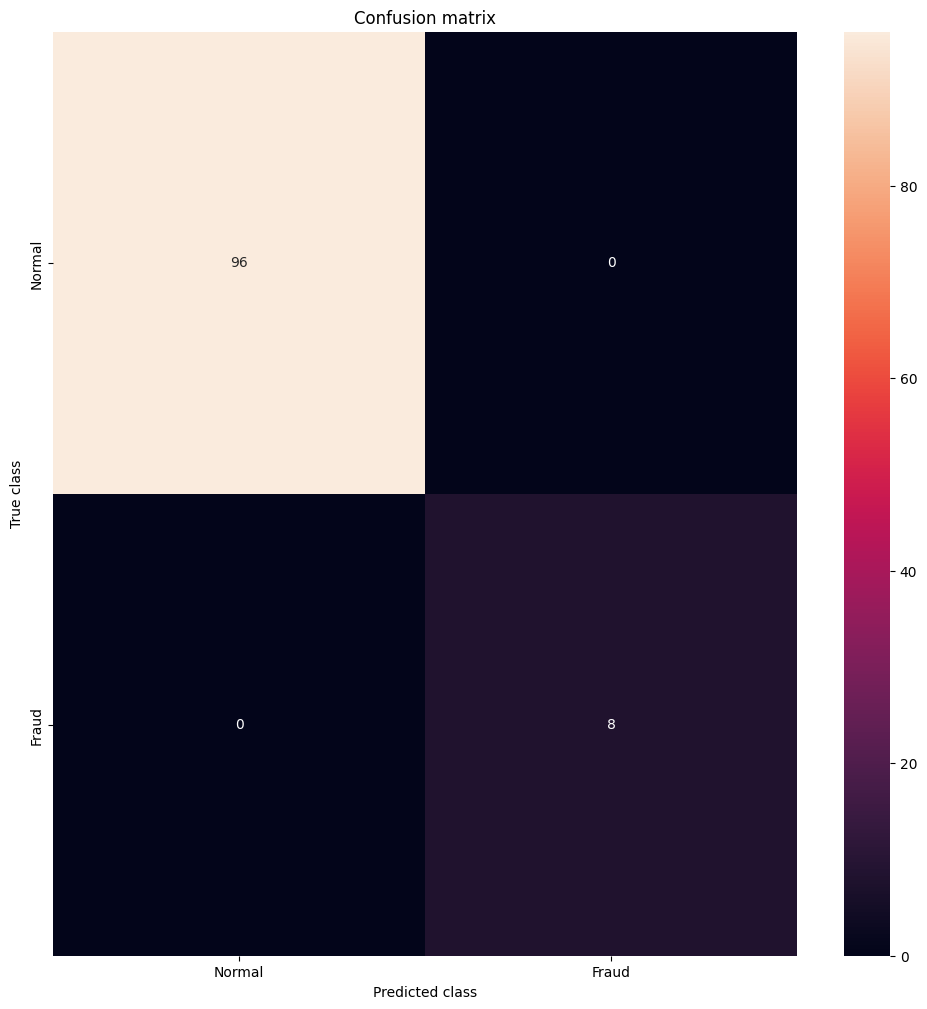

In [36]:
#visulalizing the confusion matrix
LABELS = ['Normal', 'Fraud']
from sklearn.metrics import confusion_matrix
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize =(12, 12))
sns.heatmap(conf_matrix, xticklabels = LABELS, yticklabels = LABELS, annot = True, fmt ="d");
plt.title("Confusion matrix")
plt.ylabel('True class')
plt.xlabel('Predicted class')
plt.show()

In [37]:
df_train = new_df.copy()
df_train.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
7244,9569,-0.387693,1.492809,1.934541,2.780467,0.279992,0.374731,0.328797,0.151655,-0.306550,0.663458,1.770350,-2.688344,1.129310,2.001285,-0.061989,0.310637,0.376292,0.849181,1.065235,0.218023,-0.320015,-0.665226,-0.024400,-0.106140,-0.441110,-0.074374,0.344092,0.182099,5.52,0.0
7380,9949,-0.736189,0.024862,1.675004,-0.883194,0.593015,-0.852247,-0.084817,0.046190,1.007263,-0.980906,1.922183,-1.853462,1.768137,1.579410,-0.763222,0.826895,-0.242401,0.539991,-0.310289,0.062046,-0.131885,-0.423235,0.030326,-0.010805,-0.204714,0.719840,-0.130166,-0.011547,9.42,0.0
3934,3539,1.088274,-0.195179,1.201735,1.243196,-0.863113,0.490087,-0.874880,0.463076,0.741853,0.103029,0.880606,0.091969,-1.912606,0.340289,0.341969,0.277304,-0.286132,0.480911,-0.538886,-0.285721,0.178075,0.604859,-0.044411,-0.005551,0.340895,-0.223494,0.068890,0.017508,1.00,0.0
3509,2999,-5.910028,5.301319,-0.041838,1.537238,-1.059957,3.614102,-3.572223,-17.725037,0.887597,3.245048,-0.249926,0.840545,0.146148,-0.375467,0.451021,0.212492,0.393496,-0.167327,-0.386030,-3.659460,15.631453,-5.707801,2.268338,0.082093,-0.421827,-0.300431,-0.217239,-0.609708,162.61,0.0
5362,5301,-0.657918,1.332236,1.509267,1.180903,0.617721,0.659263,0.635735,-0.087421,1.060500,0.308411,1.960728,-1.509825,2.075288,1.184013,-1.215453,-1.105043,0.836430,0.062591,0.907211,0.321348,-0.216591,0.193390,-0.239258,-0.330601,-0.067380,-0.298150,0.210011,0.024854,5.40,0.0


In [45]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

def display_feature_importance(model, percentage, top_n=34, plot=False):
    # X and y
    X = df_train.drop('Class', axis=1)
    y = df_train['Class']

    # The model is fitted using the features (X) and the target variable (y), and then the feature importances are calculated.
    model.fit(X, y)

    # Get feature importance
    feature_importance = model.feature_importances_
    feature_names = X.columns

    # Create a DataFrame for better visualization
    feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importance})

    # Sort features by importance
    feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

    # A threshold is calculated based on a specified percentage of the top feature importance.
    # Features with importance above this threshold are selected.
    threshold = percentage / 100 * feature_importance_df.iloc[0]['Importance']

    # Select features that meet the threshold
    selected_features = feature_importance_df[feature_importance_df['Importance'] >= threshold]['Feature'].tolist()

    # Print Selected Feature
    print("Selected Features by {} \n \n at threshold {}%; {}".format(model, percentage, selected_features))

    if plot:
        # Set seaborn color palette to "viridis"
        sns.set(style="whitegrid", palette="viridis")

        # Display or plot the top features
        plt.figure(figsize=(10, 6))
        sns.barplot(x='Importance', y='Feature', data=feature_importance_df.head(top_n))
        plt.title('Feature Importance for {}'.format(type(model).__name__))
        plt.show()

    # Add 'Exited' to the list of selected features
    selected_features.append('Class')

    return selected_features

In [47]:
# List to store selected features for each model and trial percentage
selected_features_xgb = []

# Initilize AUC List
auc_scores = []

# List of trial percentages
trial_percentages = [3, 5, 10, 20, 40]

# Loop over each trial percentage
for percentage in trial_percentages:
        # Get selected features for each model
        xgb_selected_features = display_feature_importance(XGBClassifier(random_state=42), percentage=percentage)

# Append selected features to the respective lists
        selected_features_xgb.append(xgb_selected_features)

        # X and y
        X = df_train.drop('Class',axis=1)
        y = df_train['Class']

        # Split the data into training and testing sets
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

        # Fit models on training data
        xgb_model = XGBClassifier()
        xgb_model.fit(X_train[[feature for feature in xgb_selected_features if feature != 'Class']], y_train, verbose=0)

        # Predict probabilities on the test set
        xgb_pred_proba = xgb_model.predict_proba(X_test[[feature for feature in xgb_selected_features if feature != 'Class']])[:, 1]

         # Calculate AUC scores and append to the list
        from sklearn.metrics import roc_auc_score

        auc_xgb = roc_auc_score(y_test, xgb_pred_proba)
        auc_scores.append((auc_xgb,percentage))

        # Sorted AUC
        sorted_auc = sorted(auc_scores, reverse=True)

# Print Each AUC with Percentage
for score , percentage in sorted_auc :
        print(f'The AUC for {type(xgb_model).__name__ , } \n with {percentage}% of top features is {score:.4f}')

Selected Features by XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=42, ...) 
 
 at threshold 3%; ['V12', 'V14', 'V10', 'V4']
Selected Features by XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=

In [48]:
# Impottant Feature Extract Using XGb
imp_fea = ['V14', 'V10', 'V4', 'V7', 'V21', 'V8', 'V20', 'V3', 'V5', 'V11', 'V12', 'V26', 'V17','Class']
df_train = df_train[imp_fea]
df_train.head()

,V14,V10,V4,V7,V21,V8,V20,V3,V5,V11,V12,V26,V17,Class
7244,2.001285,0.663458,2.780467,0.328797,-0.320015,0.151655,0.218023,1.934541,0.279992,1.770350,-2.688344,-0.074374,0.376292,0.0
7380,1.579410,-0.980906,-0.883194,-0.084817,-0.131885,0.046190,0.062046,1.675004,0.593015,1.922183,-1.853462,0.719840,-0.242401,0.0
3934,0.340289,0.103029,1.243196,-0.874880,0.178075,0.463076,-0.285721,1.201735,-0.863113,0.880606,0.091969,-0.223494,-0.286132,0.0
3509,-0.375467,3.245048,1.537238,-3.572223,15.631453,-17.725037,-3.659460,-0.041838,-1.059957,-0.249926,0.840545,-0.300431,0.393496,0.0
5362,1.184013,0.308411,1.180903,0.635735,-0.216591,-0.087421,0.321348,1.509267,0.617721,1.960728,-1.509825,-0.298150,0.836430,0.0


In [49]:
df_train.shape

(517, 14)

In [54]:
def train_random_forest(data, target):
    # Dictionary to store LabelEncoders for each categorical column
    label_encoders = {}

    # split the data into X and y
    X = data.drop(target, axis=1)
    y = data[target]

    # split the data into train and test
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

    # # Scaling Data
    # scaler = MinMaxScaler()
    # X_train = scaler.fit_transform(X_train)
    # X_test = scaler.transform(X_test)

    # Define the Random Forest model
    rf_model = RandomForestClassifier(random_state=0,class_weight='balanced')

     # Define hyperparameters for tuning
    param_grid = {
        'n_estimators': [50, 100, 150],
        'max_depth': [None, 10, 20],
        'min_samples_split': [2, 5, 10],
        'min_samples_leaf': [1, 2, 4]
    }

    # Perform GridSearchCV for hyperparameter tuning
    grid_search = GridSearchCV(rf_model, param_grid, cv=5, scoring='accuracy')
    grid_search.fit(X_train, y_train)

    # Get the best model and parameters
    best_rf_model = grid_search.best_estimator_
    best_params = grid_search.best_params_

    # Print the best hyperparameters
    print('Best Hyperparameters:')
    print(best_params)

    # Train the model on the full training set
    best_rf_model.fit(X_train, y_train)

    # Evaluate the model on the test set
    y_pred_rf = best_rf_model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred_rf)
    precision = precision_score(y_test, y_pred_rf)
    recall = recall_score(y_test, y_pred_rf)

    print(f'Accuracy on Test Set: {accuracy:.2f}')
    print(f'Precision on Test Set: {precision:.2f}')
    print(f'Recall on Test Set: {recall:.2f}')

     #visulalizing the confusion matrix
    LABELS = ['Normal', 'Fraud']
    from sklearn.metrics import confusion_matrix
    conf_matrix = confusion_matrix(y_test, y_pred_rf)
    plt.figure(figsize =(12, 12))
    sns.heatmap(conf_matrix, xticklabels = LABELS, yticklabels = LABELS, annot = True, fmt ="d");
    plt.title("Confusion matrix")
    plt.ylabel('True class')
    plt.xlabel('Predicted class')
    plt.show()

    return best_rf_model, best_params, accuracy

Best Hyperparameters:
{'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 50}
Accuracy on Test Set: 0.98
Precision on Test Set: 1.00
Recall on Test Set: 0.67


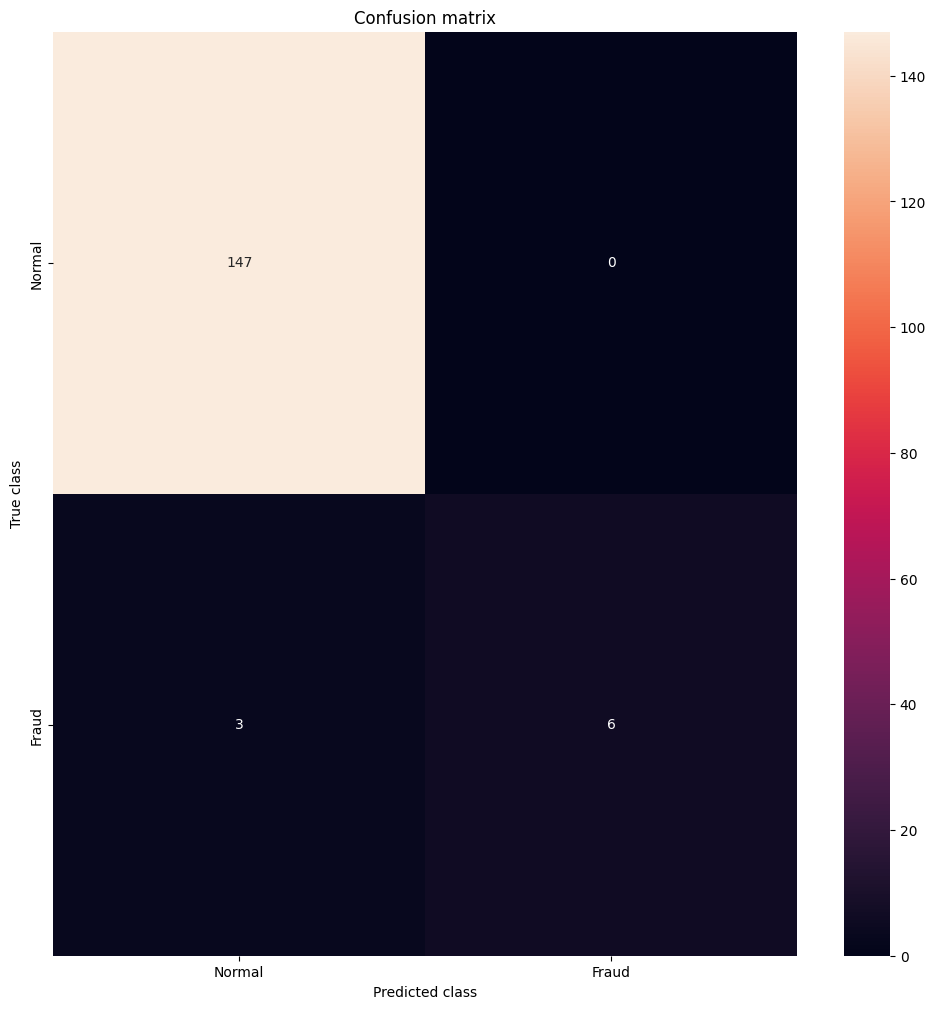

(RandomForestClassifier(class_weight='balanced', n_estimators=50, random_state=0),
 {'max_depth': None,
  'min_samples_leaf': 1,
  'min_samples_split': 2,
  'n_estimators': 50},
 0.9807692307692307)

In [55]:
train_random_forest(df_train,'Class')

In [58]:
def train_xgb_classifier(data, target):
    # split the data into X and y
    X = data.drop(target, axis=1)
    y = data[target]

    # split the data into train and test
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)


    # # Scaling Data
    # scaler = MinMaxScaler()
    # X_train = scaler.fit_transform(X_train)
    # X_test = scaler.transform(X_test)

    # Define the XGBClassifier model
    xgb_model = XGBClassifier(random_state=0)

    # Define hyperparameters for tuning
    param_grid = {
        'n_estimators': [50, 100, 150],
        'max_depth': [3, 5, 7],
        'learning_rate': [0.01, 0.1, 0.2],
        'subsample': [0.8, 1.0],
        'colsample_bytree': [0.8, 1.0],
        'gamma': [0, 1, 2]
    }

    # Perform GridSearchCV for hyperparameter tuning
    grid_search = GridSearchCV(xgb_model, param_grid, cv=5, scoring='accuracy')
    grid_search.fit(X_train, y_train)

    # Get the best model and parameters
    best_xgb_model = grid_search.best_estimator_
    best_params = grid_search.best_params_

    # Print the best hyperparameters
    print('Best Hyperparameters:')
    print(best_params)

    # Train the model on the full training set
    best_xgb_model.fit(X_train, y_train)

    # Evaluate the model on the test set
    y_pred_xgb = best_xgb_model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred_xgb)
    precision = precision_score(y_test, y_pred_xgb)
    recall = recall_score(y_test, y_pred_xgb)

    print(f'Accuracy on Test Set: {accuracy:.2f}')
    print(f'Precision on Test Set: {precision:.2f}')
    print(f'Recall on Test Set: {recall:.2f}')

    #visulalizing the confusion matrix
    LABELS = ['Normal', 'Fraud']
    from sklearn.metrics import confusion_matrix
    conf_matrix = confusion_matrix(y_test, y_pred_xgb)
    plt.figure(figsize =(12, 12))
    sns.heatmap(conf_matrix, xticklabels = LABELS, yticklabels = LABELS, annot = True, fmt ="d");
    plt.title("Confusion matrix")
    plt.ylabel('True class')
    plt.xlabel('Predicted class')
    plt.show()


    return best_xgb_model, best_params

Best Hyperparameters:
{'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 50}
Accuracy on Test Set: 0.98
Precision on Test Set: 1.00
Recall on Test Set: 0.67


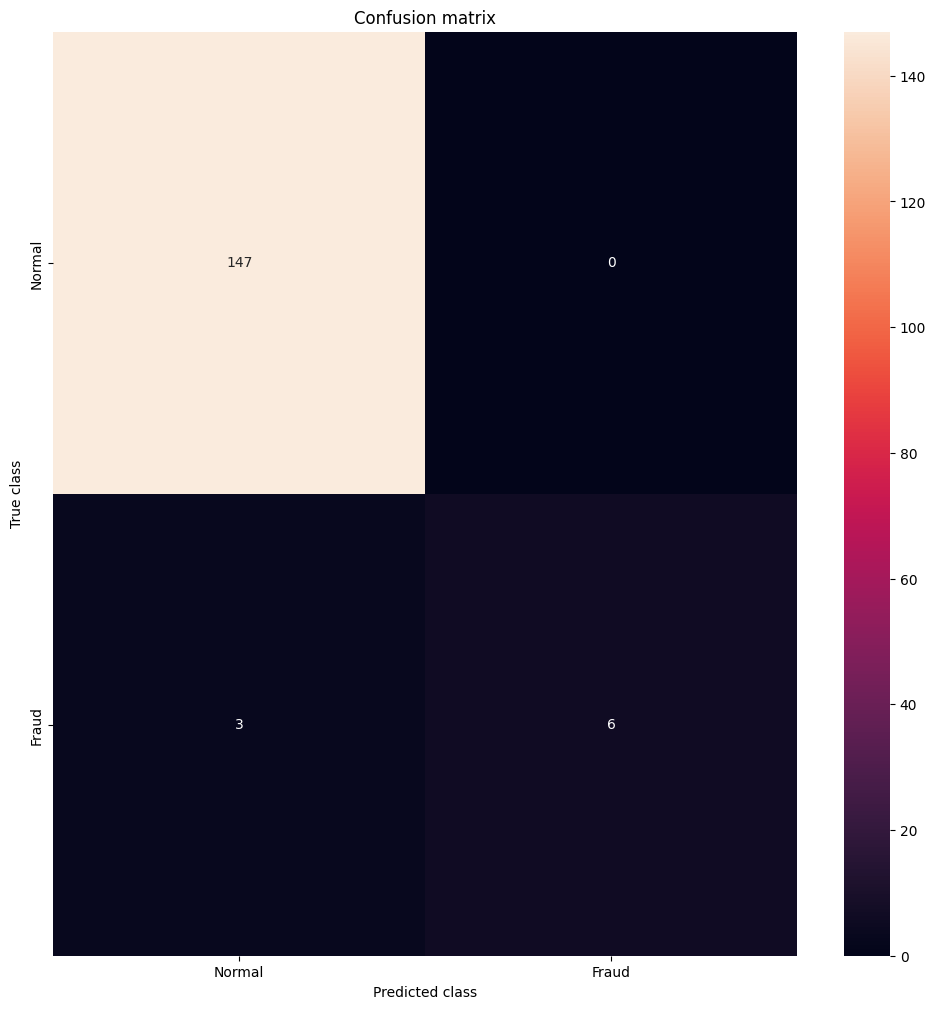

(RandomForestClassifier(class_weight='balanced', n_estimators=50, random_state=0),
 {'max_depth': None,
  'min_samples_leaf': 1,
  'min_samples_split': 2,
  'n_estimators': 50},
 0.9807692307692307)

In [59]:
train_random_forest(df_train,'Class')

In [60]:
def train_xgb_classifier(data, target):
    # split the data into X and y
    X = data.drop(target, axis=1)
    y = data[target]

    # split the data into train and test
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)


    # # Scaling Data
    # scaler = MinMaxScaler()
    # X_train = scaler.fit_transform(X_train)
    # X_test = scaler.transform(X_test)

    # Define the XGBClassifier model
    xgb_model = XGBClassifier(random_state=0)

    # Define hyperparameters for tuning
    param_grid = {
        'n_estimators': [50, 100, 150],
        'max_depth': [3, 5, 7],
        'learning_rate': [0.01, 0.1, 0.2],
        'subsample': [0.8, 1.0],
        'colsample_bytree': [0.8, 1.0],
        'gamma': [0, 1, 2]
    }

    # Perform GridSearchCV for hyperparameter tuning
    grid_search = GridSearchCV(xgb_model, param_grid, cv=5, scoring='accuracy')
    grid_search.fit(X_train, y_train)

    # Get the best model and parameters
    best_xgb_model = grid_search.best_estimator_
    best_params = grid_search.best_params_

    # Print the best hyperparameters
    print('Best Hyperparameters:')
    print(best_params)

    # Train the model on the full training set
    best_xgb_model.fit(X_train, y_train)

    # Evaluate the model on the test set
    y_pred_xgb = best_xgb_model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred_xgb)
    precision = precision_score(y_test, y_pred_xgb)
    recall = recall_score(y_test, y_pred_xgb)

    print(f'Accuracy on Test Set: {accuracy:.2f}')
    print(f'Precision on Test Set: {precision:.2f}')
    print(f'Recall on Test Set: {recall:.2f}')

    #visulalizing the confusion matrix
    LABELS = ['Normal', 'Fraud']
    from sklearn.metrics import confusion_matrix
    conf_matrix = confusion_matrix(y_test, y_pred_xgb)
    plt.figure(figsize =(12, 12))

    sns.heatmap(conf_matrix, xticklabels = LABELS, yticklabels = LABELS, annot = True, fmt ="d");
    plt.title("Confusion matrix")
    plt.ylabel('True class')
    plt.xlabel('Predicted class')
    plt.show()


    return best_xgb_model, best_params

Best Hyperparameters:
{'colsample_bytree': 0.8, 'gamma': 0, 'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 100, 'subsample': 0.8}
Accuracy on Test Set: 0.98
Precision on Test Set: 1.00
Recall on Test Set: 0.67


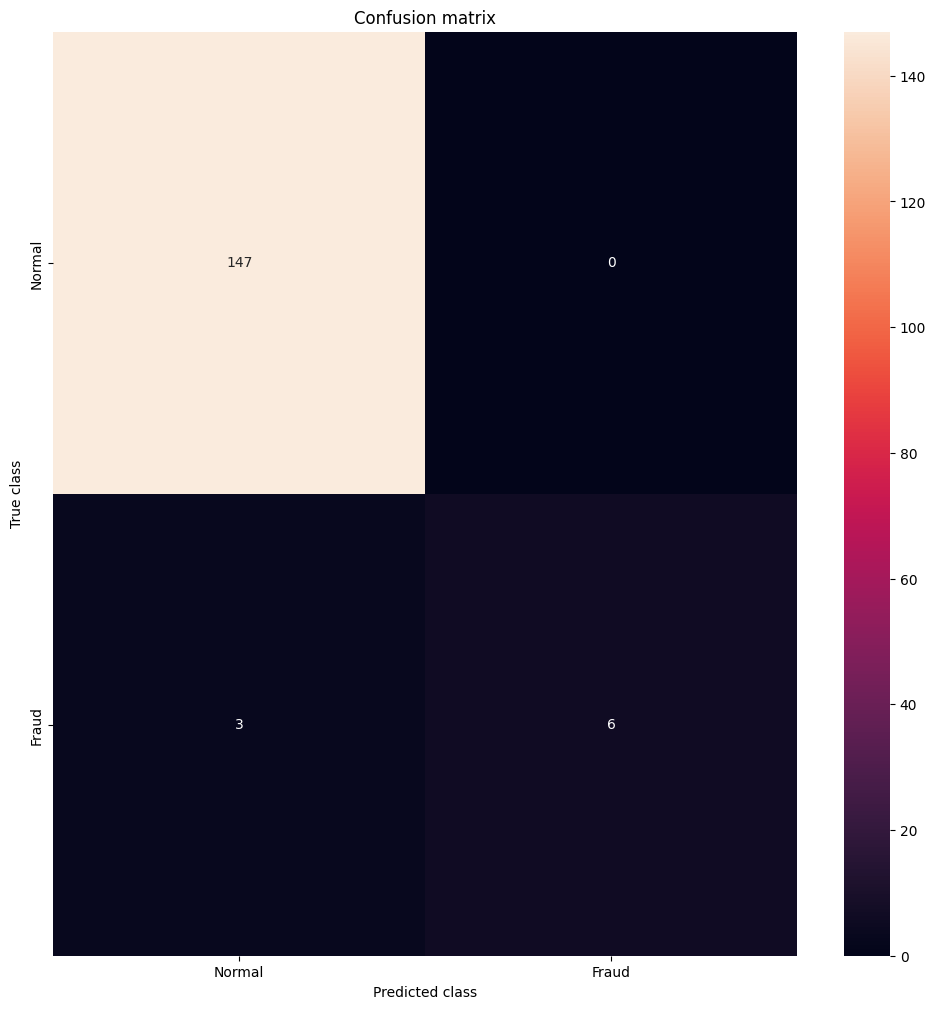

(XGBClassifier(base_score=None, booster=None, callbacks=None,
               colsample_bylevel=None, colsample_bynode=None,
               colsample_bytree=0.8, device=None, early_stopping_rounds=None,
               enable_categorical=False, eval_metric=None, feature_types=None,
               gamma=0, grow_policy=None, importance_type=None,
               interaction_constraints=None, learning_rate=0.01, max_bin=None,
               max_cat_threshold=None, max_cat_to_onehot=None,
               max_delta_step=None, max_depth=3, max_leaves=None,
               min_child_weight=None, missing=nan, monotone_constraints=None,
               multi_strategy=None, n_estimators=100, n_jobs=None,
               num_parallel_tree=None, random_state=0, ...),
 {'colsample_bytree': 0.8,
  'gamma': 0,
  'learning_rate': 0.01,
  'max_depth': 3,
  'n_estimators': 100,
  'subsample': 0.8})

In [61]:
train_xgb_classifier(df_train,'Class')

In [62]:
# Selcting Best and Highest Accuracy from Above trained Models
# XGb Model Classifier
# Random Forest
models = ['XGB Classifier', 'RandomForestClassifier']
accuracy_scores = [accuracy, accuracy]

# Find the index of the maximum accuracy
best_accuracy_index = accuracy_scores.index(max(accuracy_scores))

# Print the best model for accuracy
print(f'Best Accuracy: {accuracy_scores[best_accuracy_index]:.2f} with Model: {models[best_accuracy_index]}')

Best Accuracy: 1.00 with Model: XGB Classifier
